In [125]:
import pandas as pd

In [126]:
dataset=pd.read_csv("Placement.csv")

In [127]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 1.) Replace the Nan values with correct value
we  going to replace Nan is value with zero so that our data set meaning will not change 


In [128]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [129]:
dataset["salary"].fillna(0,inplace=True)


In [130]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# 2) How many of them are not placed?

In [13]:
df=dataset["status"]=="Not Placed"
df.sum()

67

# what kind of relation between salary and mba_p?


In [131]:
quan=[]
qual=[]
for columnName in dataset.columns:
    #print(columnName)
    if(dataset[columnName].dtype=='O'):
        #print("qual")
        qual.append(columnName)
    else:
        #print("quan")
        quan.append(columnName)

In [16]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


Answer:value 0.139823 we getting low degree postive Correlation

# which specialization is getting minimum salary?

In [88]:
df = dataset[dataset['specialisation'] == 'Mkt&HR']
#df.count()
df['salary'].mean()

150842.1052631579

In [89]:
df = dataset[dataset['specialisation'] == 'Mkt&Fin']
#df.count()
df['salary'].mean()

236591.66666666666

Answer:specialisation Mkt&HR is getting minimum salary

# How many of them getting above 500000 Salary?

In [90]:
dataset[dataset['salary'] > 500000].count()

sl_no             3
gender            3
ssc_p             3
ssc_b             3
hsc_p             3
hsc_b             3
hsc_s             3
degree_p          3
degree_t          3
workex            3
etest_p           3
specialisation    3
mba_p             3
status            3
salary            3
dtype: int64

Answer:3 person is getting above 500000 salary

# Test  the Analysis of variance between etest_p and mba_p(using Hypothesis Testing)

In [98]:
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

Answer: Accept null hypothesis and reject alternative hypothesis because p value is greater than 0.05
There is no significance betweent etest_p and mba_p

# Test the similarity between degree_t(sci$Tech) and specialisation(mkt&hr)(using Hypothesis Testing)

In [106]:
from scipy.stats import ttest_ind
#dataset=dataset.dropna()
degree = dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation = dataset[dataset['specialisation']=='Mkt&HR']['salary']
#print(male)
ttest_ind(degree, specialisation)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

Answer: Reject null hypothesis and Accept alternative hypothesis because p value is less than 0.05
There is  significance similarity between degree_t(sci$Tech) and specialisation(mkt&hr)

# Convert the normal distribution to standard normal distribution for salary colum

/tmp/ipykernel_26564/3231460646.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


-8.881784197001253e-17

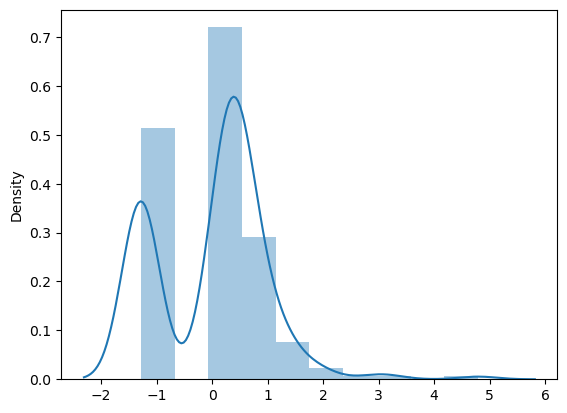

In [133]:
# Coverted to standard Normal Distribution
import seaborn as sns
dataset=dataset.dropna()
mean=dataset['salary'].mean()
std=dataset['salary'].std()

values=[i for i in dataset['salary']]

z_score=[((j-mean)/std) for j in values]

sns.distplot(z_score,kde=True)

sum(z_score)/len(z_score)
#z_score.std()

# what is the probabilty Density Function of the salary range  from 700000 to 900000?

In [ ]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

/tmp/ipykernel_26564/2842244316.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974901


0.0005973310593974901

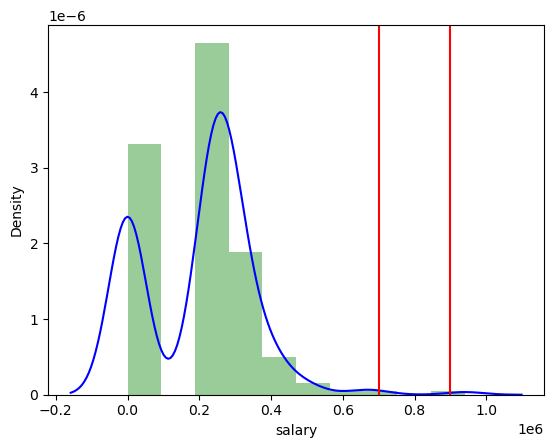

In [136]:
get_pdf_probability(dataset['salary'],700000,900000)

Answer:  probabilty getting of the salary range from 700000 to 900000 is 0.0005973310593974901

# Test the similarity between the degree_t(sci&Tech)with respect to etest_p and mba_p at significance level

In [137]:
from scipy.stats import ttest_rel
dataset=dataset.dropna()
degree = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
degree1 = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(degree, degree1)


TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

Answer: Accept null hypothesis and reject alternative hypothesis because p value is greater than 0.05
There is no significance betweent etest_p and mba_p

# which parameter is highly correlated with salary

In [138]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


Answer: ssc_p is highly correlated with salary

# Plot any useful graph and explain it

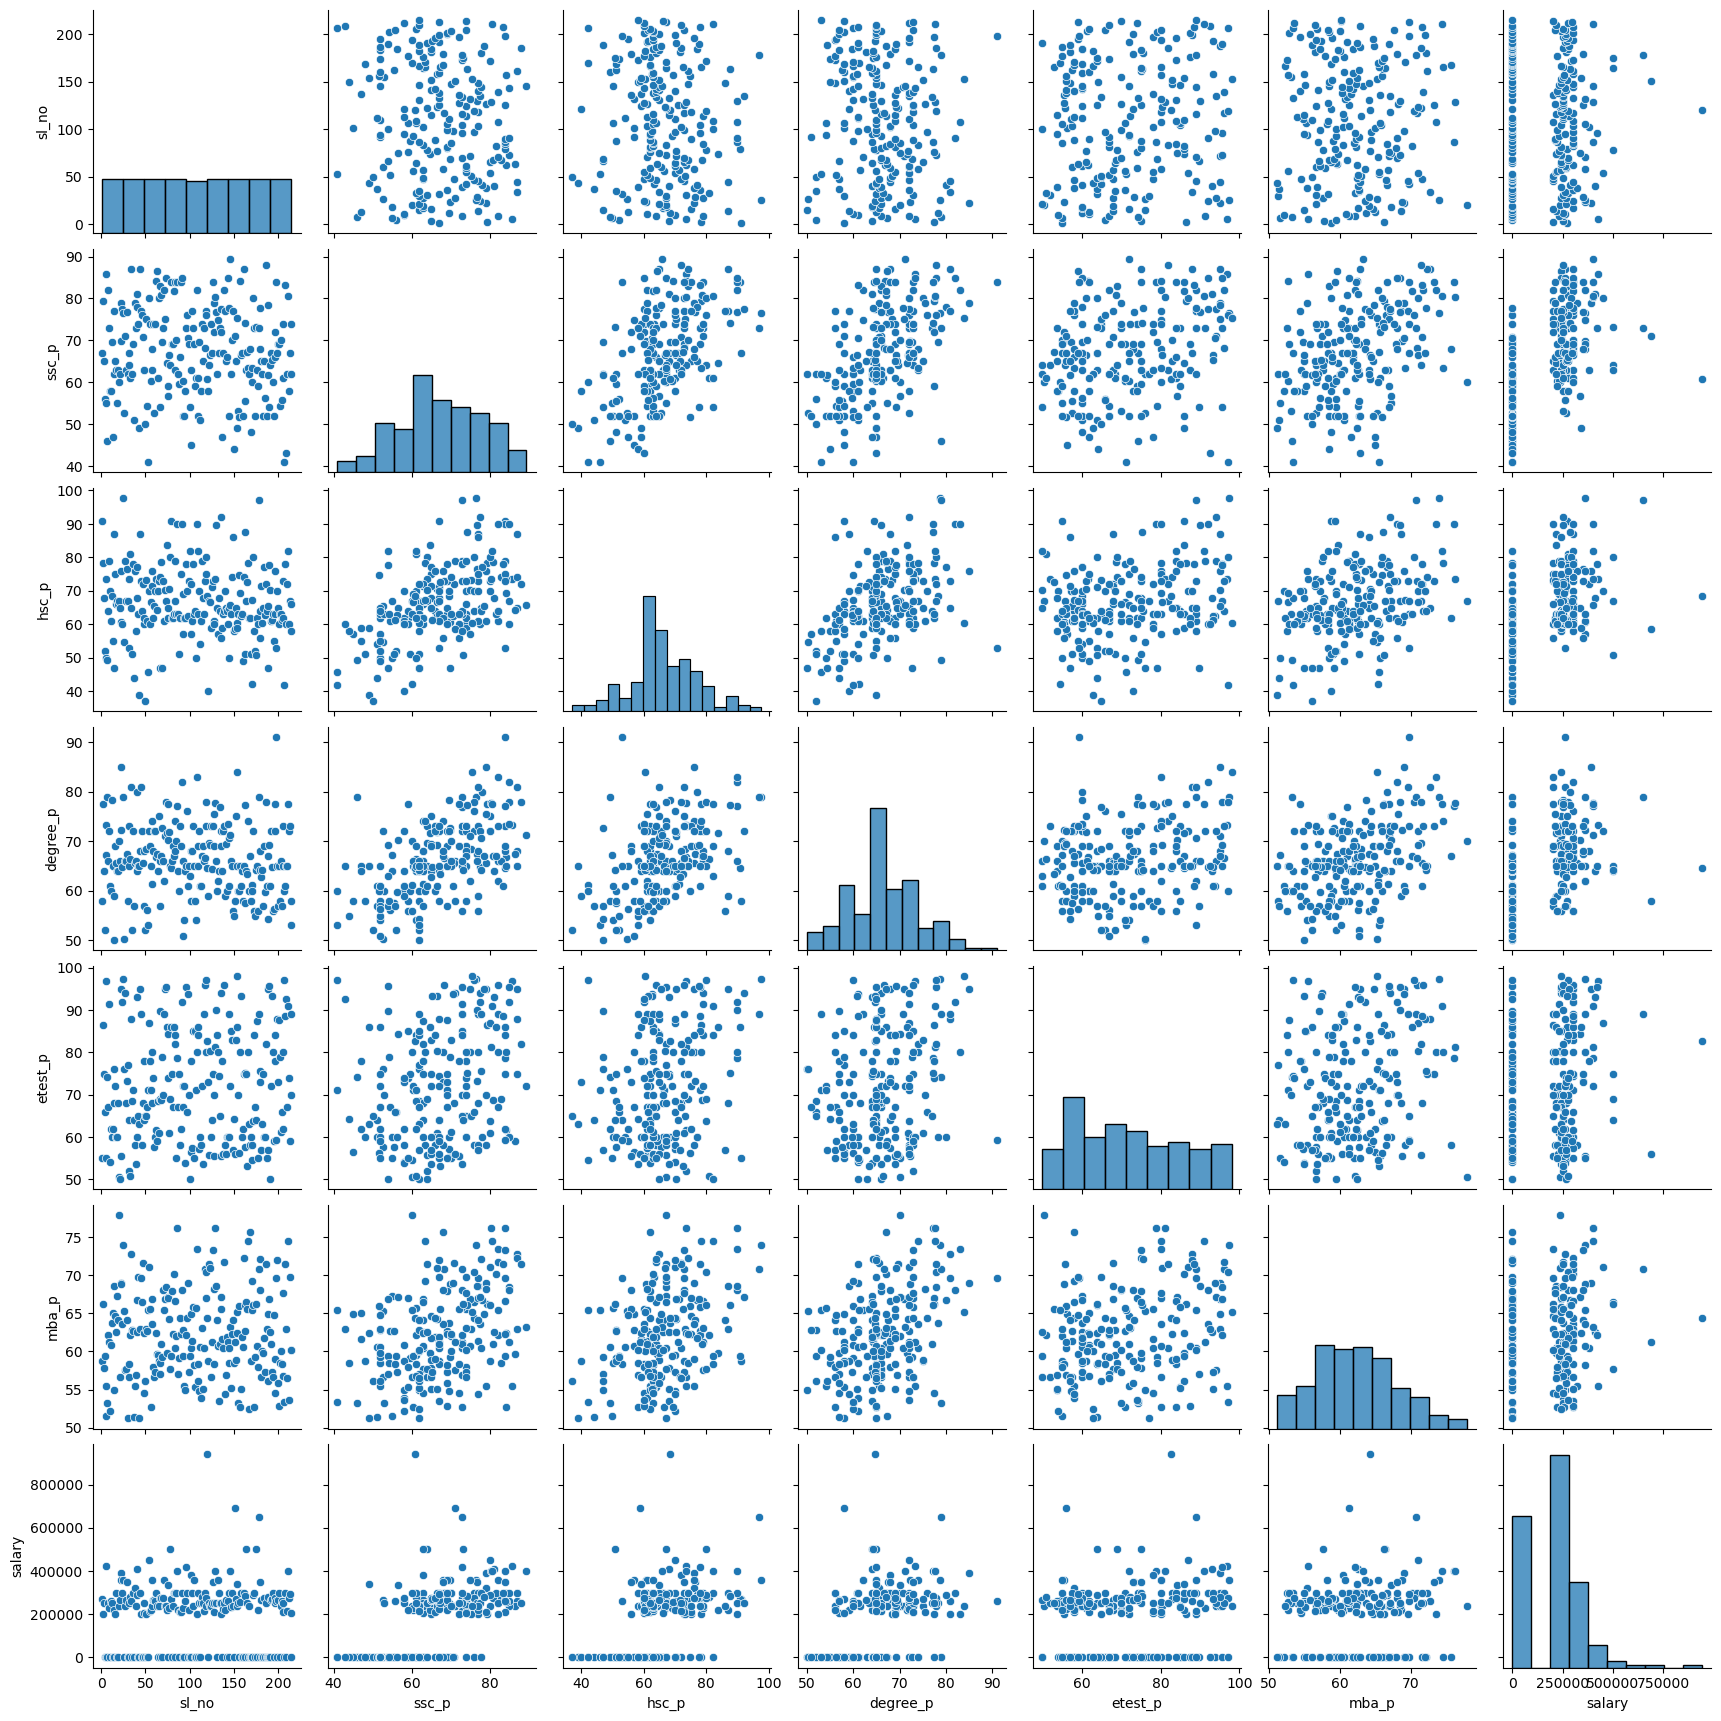

In [140]:
import seaborn as sns
sns.pairplot(dataset)

#import matplotlib.pyplot as plt
#plt.savefig('pairplot_ssc_b.png')

# Find the reason for non Placement 

In [160]:
df=dataset.loc[dataset['status']== "Not Placed"]
df.count()

sl_no             67
gender            67
ssc_p             67
ssc_b             67
hsc_p             67
hsc_b             67
hsc_s             67
degree_p          67
degree_t          67
workex            67
etest_p           67
specialisation    67
mba_p             67
status            67
salary            67
dtype: int64

In [163]:
df1=df[df['degree_t']=='Comm&Mgmt']
df1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.00,Central,55.00,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
14,15,M,62.00,Central,47.00,Central,Commerce,50.00,Comm&Mgmt,No,76.00,Mkt&HR,54.96,Not Placed,0.0
17,18,F,55.00,Central,67.00,Central,Commerce,64.00,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,Not Placed,0.0
18,19,F,63.00,Central,66.00,Central,Commerce,64.00,Comm&Mgmt,No,68.00,Mkt&HR,64.08,Not Placed,0.0
25,26,F,52.58,Others,54.60,Central,Commerce,50.20,Comm&Mgmt,Yes,76.00,Mkt&Fin,65.33,Not Placed,0.0
29,30,M,62.00,Central,67.00,Central,Commerce,58.00,Comm&Mgmt,No,77.00,Mkt&Fin,51.29,Not Placed,0.0
36,37,M,51.00,Central,44.00,Central,Commerce,57.00,Comm&Mgmt,No,64.00,Mkt&Fin,51.45,Not Placed,0.0
41,42,F,74.00,Others,63.16,Others,Commerce,65.00,Comm&Mgmt,Yes,65.00,Mkt&HR,69.76,Not Placed,0.0


In [164]:
df2=df[df['degree_t']=='Sci&Tech']
df2

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
31,32,F,67.00,Central,53.00,Central,Science,65.00,Sci&Tech,No,64.00,Mkt&HR,58.32,Not Placed,0.0
45,46,F,76.00,Central,64.00,Central,Science,72.00,Sci&Tech,No,58.00,Mkt&HR,66.53,Not Placed,0.0
68,69,F,69.70,Central,47.00,Central,Commerce,72.70,Sci&Tech,No,79.00,Mkt&HR,59.24,Not Placed,0.0
79,80,F,69.00,Central,62.00,Central,Science,66.00,Sci&Tech,No,75.00,Mkt&HR,67.99,Not Placed,0.0
99,100,M,54.00,Central,82.00,Others,Commerce,63.00,Sci&Tech,No,50.00,Mkt&Fin,59.47,Not Placed,0.0
105,106,M,59.00,Central,64.00,Others,Science,58.00,Sci&Tech,No,85.00,Mkt&HR,55.30,Not Placed,0.0
106,107,M,61.08,Others,50.00,Others,Science,54.00,Sci&Tech,No,71.00,Mkt&Fin,65.69,Not Placed,0.0
109,110,M,52.00,Central,63.00,Others,Science,65.00,Sci&Tech,Yes,86.00,Mkt&HR,56.09,Not Placed,0.0


In [159]:
df3=df[df['degree_t']=='Others']
df3

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
34,35,M,62.0,Others,51.0,Others,Science,52.0,Others,No,68.44,Mkt&HR,62.77,Not Placed,0.0
42,43,M,49.0,Others,39.0,Central,Science,65.0,Others,No,63.00,Mkt&Fin,51.21,Not Placed,0.0
49,50,F,50.0,Others,37.0,Others,Arts,52.0,Others,No,65.00,Mkt&HR,56.11,Not Placed,0.0
87,88,M,59.6,Central,51.0,Central,Science,60.0,Others,No,75.00,Mkt&HR,59.08,Not Placed,0.0
182,183,M,52.0,Others,65.0,Others,Arts,57.0,Others,Yes,75.00,Mkt&Fin,59.81,Not Placed,0.0
198,199,F,67.0,Central,70.0,Central,Commerce,65.0,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0


Answer: most non placed student form Commerce degree 
